The integral is just the "average vector" from summing all the x and y values together 

we have some f(t) which returns a vector of (x, y) positions at that time t

can do the trapezium method to estimate the integral of the x values and then divide by b-a

In [3]:
from typing import List

In [15]:
def get_average(vals: List[int]) -> int:
    if len(vals) < 3:
        return "error"
    interval_width: int = 1
    # trapezium method
    middle = vals[1:-1]
    # divide by b-a = len(int)-1
    integral =  0.5*interval_width*(vals[0] + 2*sum(middle) + vals[-1])
    return integral/(len(vals)-1)

In [58]:
import matplotlib.pyplot as plt
def plot_data(data):
    
    plt.scatter(x = data[:, 0], y = data[:, 1])
    plt.axis('equal')
    plt.show()

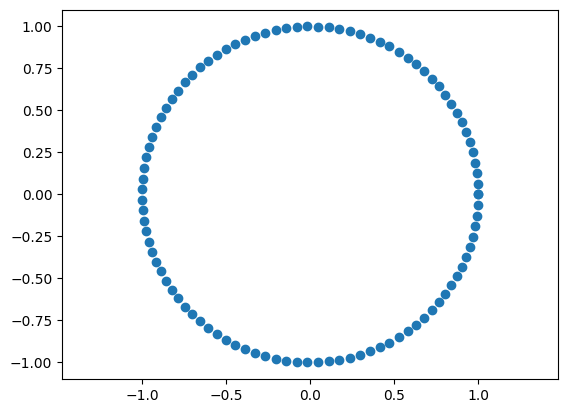

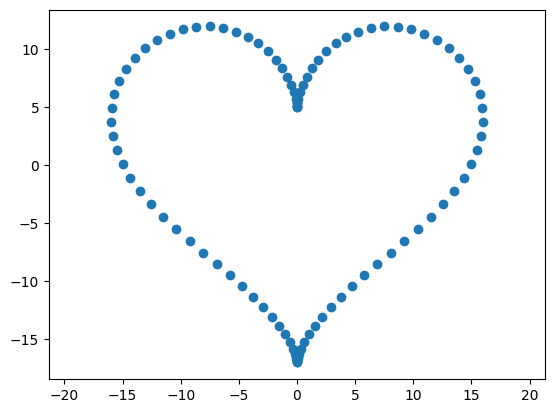

In [ ]:
import numpy as np

r = 1
# Simple cirle 
data_circle = np.array([(r*np.cos(theta), r*np.sin(theta)) for theta in np.linspace(0, 2*np.pi, 100)])


# print(data_circle)
plot_data(data_circle)


In [ ]:
print(f"{get_average(data_circle[:,0])}, {get_average(data_circle[:,1])}")

-7.011934892369409e-17, 2.8614164992650454e-17


c0 is the average vector 

In [51]:
def get_c_j(x_y_vals: "np array", j: int) -> float:
    # J is the c value we want to find

    # first get the average of x and y independently

    fx = lambda t : x_y_vals[t][0]*np.cos(-2*np.pi*j*t) - x_y_vals[t][1]*np.sin(-2*np.pi*j*t)
    fy = lambda t : x_y_vals[t][1]*np.cos(-2*np.pi*j*t) + x_y_vals[t][0]*np.sin(-2*np.pi*j*t)

    fx_vals = np.array([fx(t) for t in range(len(x_y_vals))])
    fy_vals = np.array([fy(t) for t in range(len(x_y_vals))])

    return (get_average(fx_vals), get_average(fy_vals))


In [ ]:
get_c_j(data_circle, -2)

(-1.472506327397576e-15, 4.3813206178432473e-16)

In [ ]:
max_j = 100
min_j = -max_j

def get_c_data(data, min_j=-20, max_j=20):
    # max is inclusive
    return [(j,get_c_j(data, j)) for j in range(min_j, max_j+1)]
c_data = get_c_data(min_j, max_j, data_circle)
c_data

[(-100, (1.1926132596104971e-14, -9.737381858305203e-15)),
 (-99, (9.657771658423468e-14, -1.9571864725555027e-14)),
 (-98, (-1.9897533912913594e-13, -2.342575145752145e-14)),
 (-97, (-1.5159803237302663e-13, 5.432467575999963e-14)),
 (-96, (-5.4342495415862924e-14, -2.6520256090182908e-14)),
 (-95, (-2.2905653981740073e-14, 2.0648209736746546e-15)),
 (-94, (4.243973593606585e-14, 2.6550837765034607e-14)),
 (-93, (-2.3024856874910354e-13, 8.284503189710561e-15)),
 (-92, (-1.4950613846346975e-13, 3.0389383757203394e-14)),
 (-91, (-1.0840451343603108e-13, 1.957615164456034e-14)),
 (-90, (6.2639951705166724e-15, -1.0420565677790026e-14)),
 (-89, (1.1189879432406182e-14, 1.0346203981075645e-14)),
 (-88, (-2.350049979177608e-13, 7.931846212970368e-17)),
 (-87, (-1.6964207816272392e-13, -2.3454732201086858e-14)),
 (-86, (-9.216019760204194e-14, 3.4121774003179734e-14)),
 (-85, (-2.49391151005272e-14, -2.6479117484824622e-14)),
 (-84, (5.28349294140035e-14, 1.3883088558675063e-14)),
 (-83, (7

In [54]:
def sort_by_speed(c_data, asc = True):
    """Assumes continuity between max and min j
    sorts by speed ascending"""

    max_j = max(c_data, key = lambda row : row[0])[0]
    min_j = min(c_data, key = lambda row : row[0])[0]
    # indices to go in order of 
    # indices = [0]

    # i = 1
    output = []

    zero_index = 0
    # find the index of 0
    while (c_data[zero_index][0] != 0):
        zero_index += 1

    output.append(c_data[zero_index])

    i = 1

    while zero_index-i >= 0 and zero_index+i < len(c_data):
        output.extend([c_data[zero_index-i], c_data[zero_index+i]])
        i += 1

    while zero_index-i >= 0:
        output.append(c_data[zero_index-i])
        i+=1
    
    while zero_index+i < len(c_data):
        output.append(c_data[zero_index+i])
        i+=1 

    if asc:
        return output
    return output[::-1]

sort_by_speed(c_data)

[(0, (-7.011934892369409e-17, 2.8614164992650454e-17)),
 (-1, (-7.829993963145841e-16, 2.3629475292697483e-16)),
 (1, (6.310741403132469e-16, -1.7906642294167392e-16)),
 (-2, (-1.472506327397576e-15, 4.3813206178432473e-16)),
 (2, (1.3264243504732134e-15, -3.5753061549112577e-16)),
 (-3, (-1.7763568394002505e-15, -8.091638404480034e-16)),
 (3, (1.6302748624758878e-15, 8.313324959714572e-16)),
 (-4, (-2.898266422179356e-15, 8.534932376529735e-16)),
 (4, (2.6937516544852483e-15, -7.378321168979276e-16)),
 (-5, (-5.025220006198077e-15, 1.2364721978965331e-15)),
 (5, (4.896667866504638e-15, -1.2026169842191302e-15)),
 (-6, (-3.5059674461847047e-15, -1.64402020635017e-15)),
 (6, (3.324825794798495e-15, 1.6194426292578277e-15)),
 (-7, (-5.188831820353363e-15, 6.760057679104391e-16)),
 (7, (5.042749843429e-15, -5.486580890014441e-16)),
 (-8, (-5.691353820973171e-15, 1.6228611590820387e-15)),
 (8, (5.562801681279732e-15, -1.4370806894032987e-15)),
 (-9, (-5.258951169277058e-15, -3.253111049951

# Full end to end

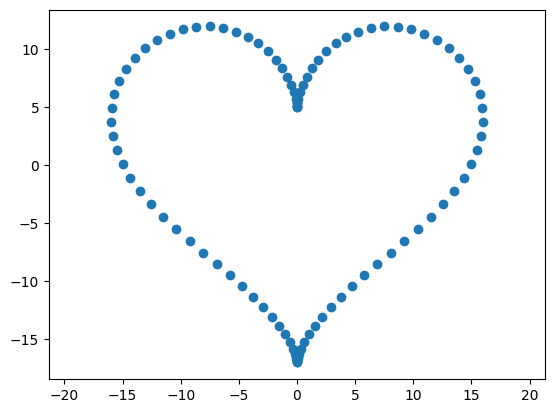

In [70]:
# heart
data_heart = np.array([
    (16 * np.sin(t)**3,
     13 * np.cos(t) - 5 * np.cos(2*t) - 2 * np.cos(3*t) - np.cos(4*t))
    for t in np.linspace(0, 2*np.pi, 100) 
])
plot_data(data_heart)

In [ ]:
c_data_heart = sort_by_speed(get_c_data(data_heart))
c_data_heart

[(0, (-2.740600255153056e-16, 3.7680296593338647e-16)),
 (-1, (5.263117038667496e-15, 4.4139776009339556e-14)),
 (1, (-4.743628686220179e-15, -4.3386170077472787e-14)),
 (-2, (1.212323978402453e-14, 8.742725959573455e-14)),
 (2, (-1.3873540726366422e-14, -8.717605761844563e-14)),
 (-3, (-1.3899396320938675e-15, 1.2039751911490585e-13)),
 (3, (2.1247439650745485e-15, -1.2089992306948372e-13)),
 (-4, (2.5273935255918898e-14, 1.7437902973445793e-13)),
 (4, (-2.349843701702696e-14, -1.7269238788694658e-13)),
 (-5, (-1.667945730768059e-14, 2.063803673412291e-13)),
 (5, (1.845495554657253e-14, -2.067392273087847e-13)),
 (-6, (-4.597479436764921e-16, 2.4054383625252283e-13)),
 (6, (1.7238707288016919e-15, -2.404720642590117e-13)),
 (-7, (1.2159998429880932e-14, 3.115173663358328e-13)),
 (7, (-1.0420386187744553e-14, -3.1112262037152163e-13)),
 (-8, (4.6238195350204364e-14, 3.4868628747540473e-13)),
 (8, (-4.711826087122391e-14, -3.481479975240713e-13)),
 (-9, (5.109962753065679e-14, 3.8380073